<a href="https://colab.research.google.com/github/VyanPersad/Model_Files/blob/main/Sanitised_Data_w_All_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#import additional libraries
import numpy as np
import pandas as pd
import xlrd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#for splitting the data into training and test set
from sklearn.model_selection import train_test_split
# For Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model

In [ ]:
# Specify the full path to the CSV file
file_path = r'/content/drive/MyDrive/DataSheets/Data Collection Form less.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,PID,HbA1c (%):,Outcome,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,ASM,Gabor1,...,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,Gabor10,Gabor11,k-Value
0,IR001,8.99,1,150.9329,4.1742,0.6330,0.5690,0.9763,0.3238,7.9122,...,19.1260,6.9047,10.9206,13.6130,19.5786,13.9414,9.0486,17.3970,14.1076,198.4352
1,IR027,10.08,1,158.9189,4.6354,0.5577,0.4775,0.9832,0.2280,13.7746,...,17.3310,15.0561,12.3223,13.2295,15.0663,13.3945,9.9928,18.2174,11.6113,178.2943
2,IR028,5.45,0,156.2786,3.6418,0.7192,0.6803,0.9761,0.4628,11.3907,...,12.0413,10.4522,11.6261,10.8756,12.0889,11.3804,8.7483,15.7571,9.3860,209.8139
3,IR033,5.70,1,116.5736,4.6044,0.5737,0.4970,0.9902,0.2470,6.3685,...,19.1331,7.2303,11.5939,12.2341,14.7656,11.8872,9.5367,17.2296,10.4424,172.7037
4,IR040,5.45,0,221.0747,4.2007,0.7771,0.7493,0.9631,0.5615,13.3230,...,14.4808,10.5218,14.3009,13.8768,13.5918,14.1895,9.2622,16.7702,9.2342,221.3348


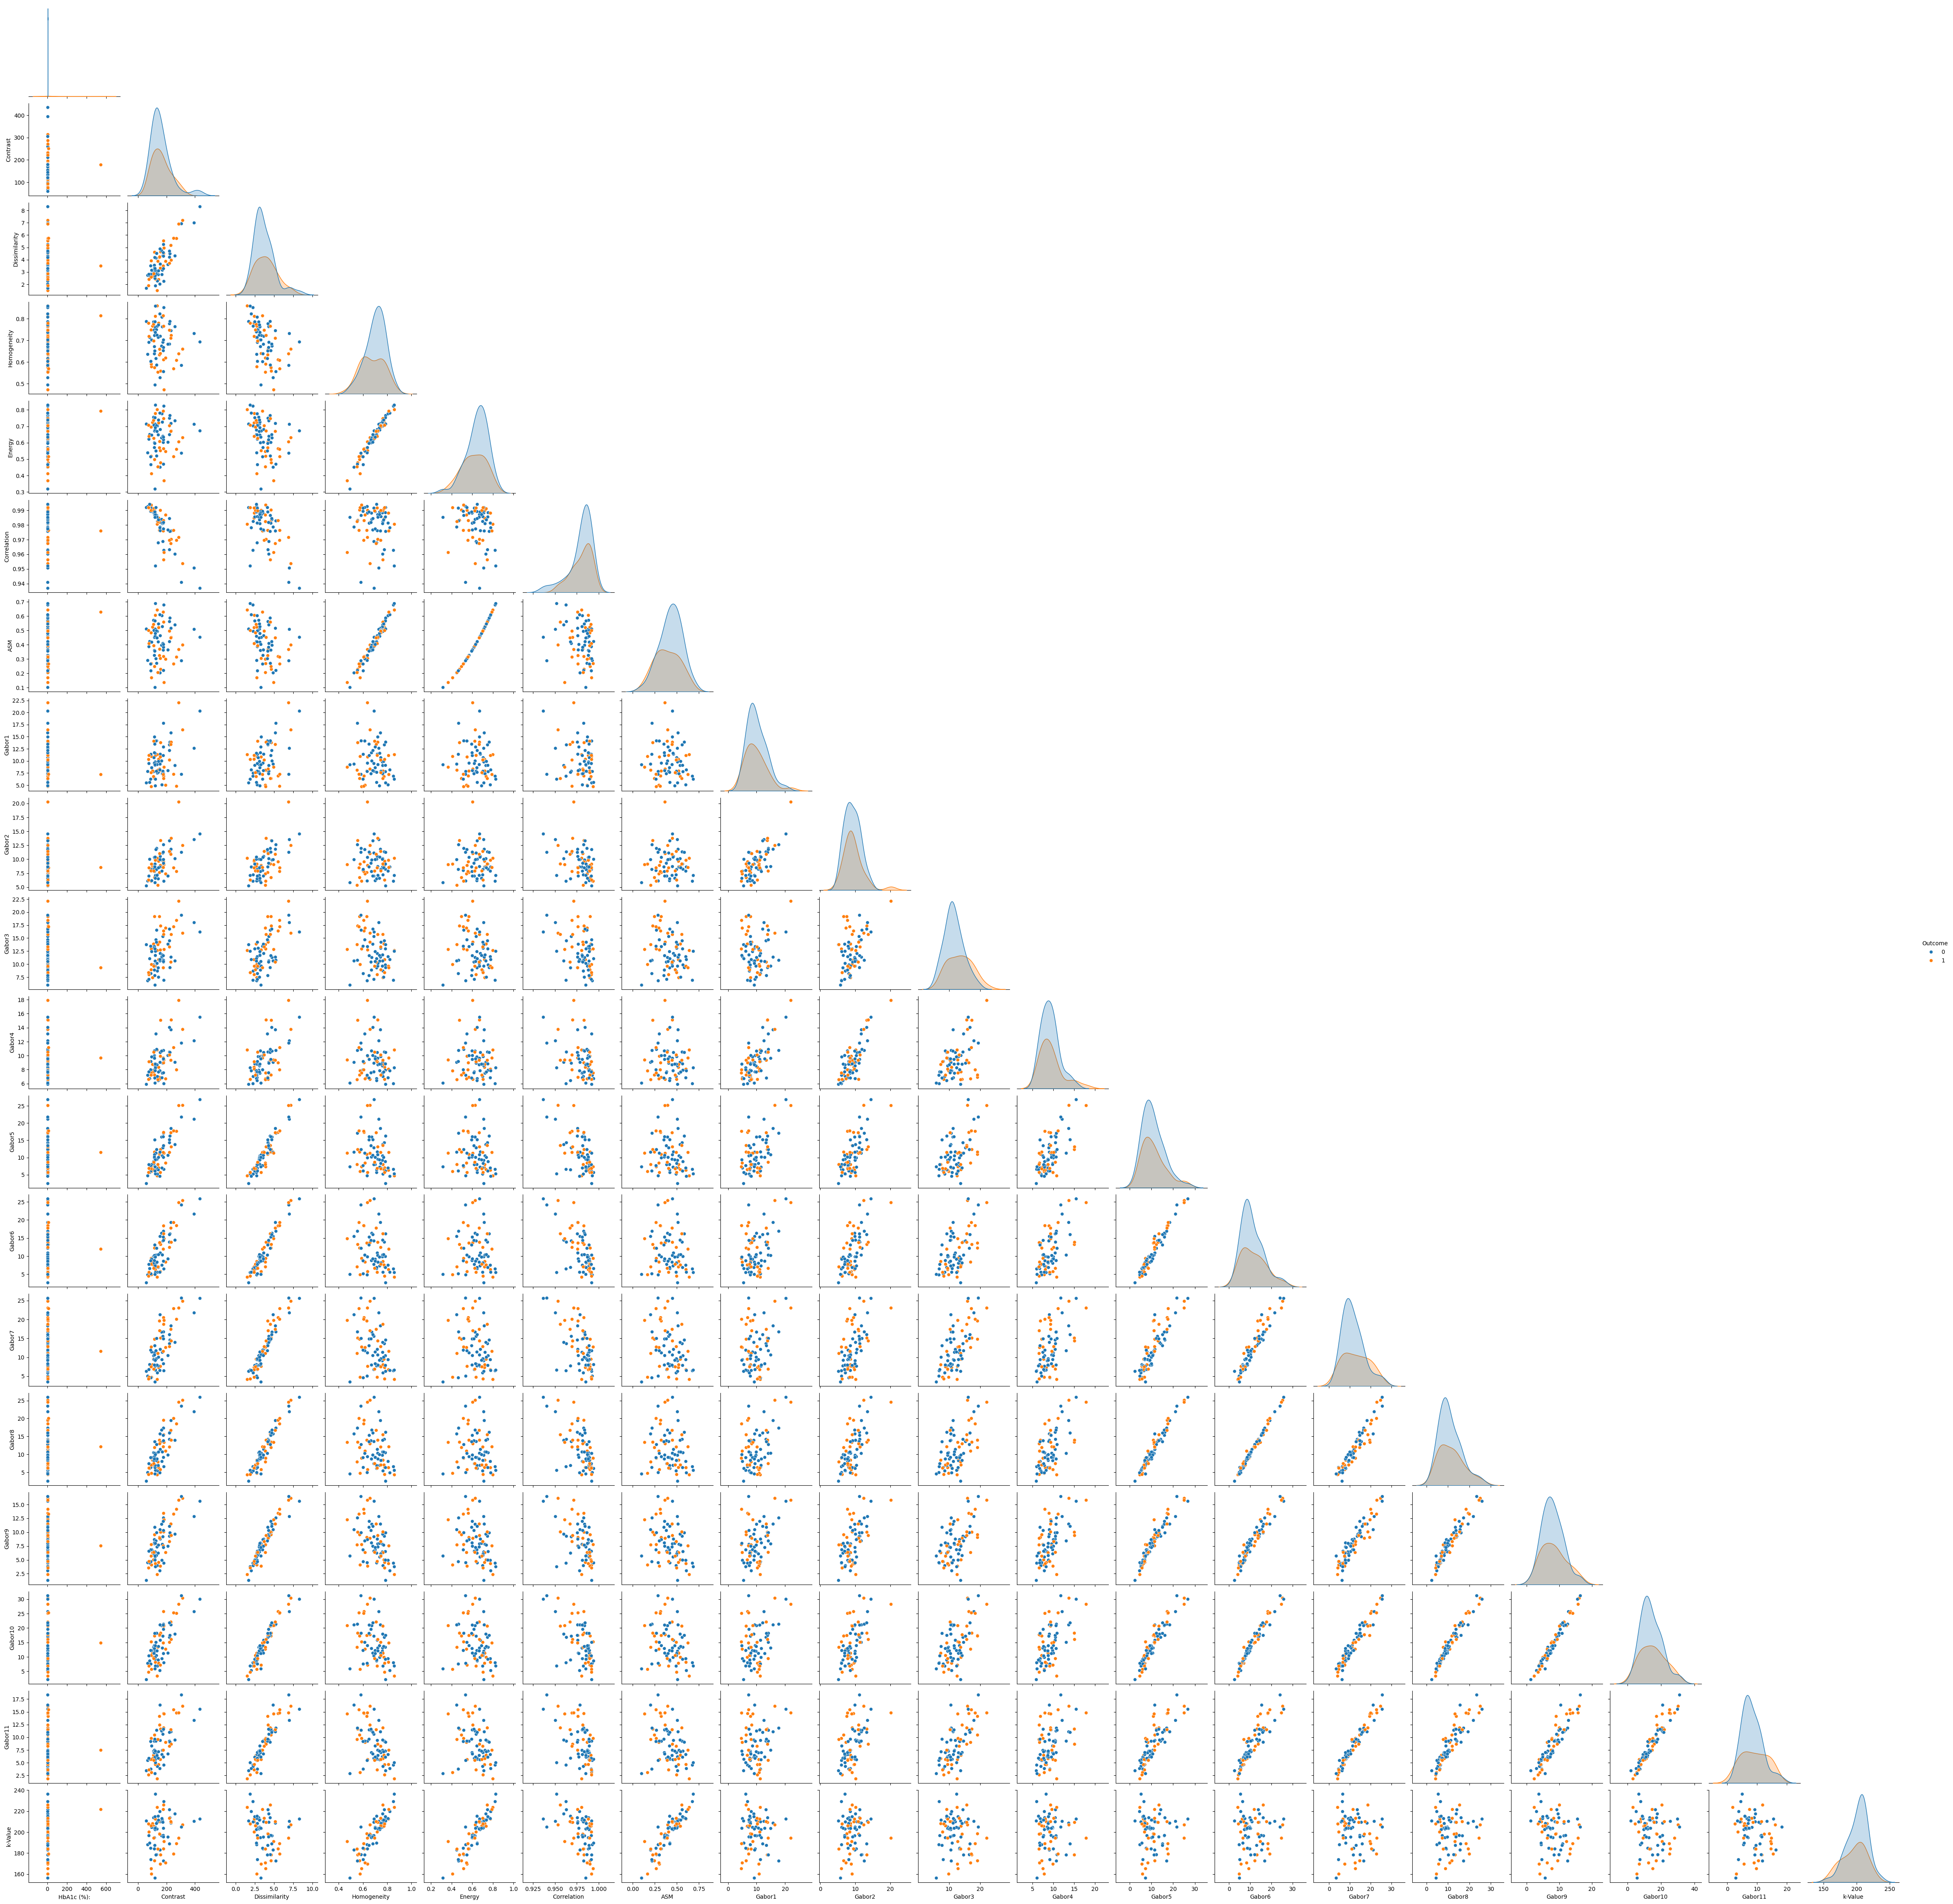

In [ ]:
sns.pairplot(df, hue ='Outcome',corner=True)

In [ ]:
# We split the attributes and labels into X and y variables
X = df[['Contrast',	'Dissimilarity',	'Homogeneity',	'Energy',	'Correlation',	'ASM','Gabor1','Gabor2','Gabor2','Gabor4','Gabor5','Gabor6','Gabor7','Gabor8','Gabor9','Gabor10','Gabor11','k-Value']].values
y = df["Outcome"]

Text(0, 0.5, 'Count')

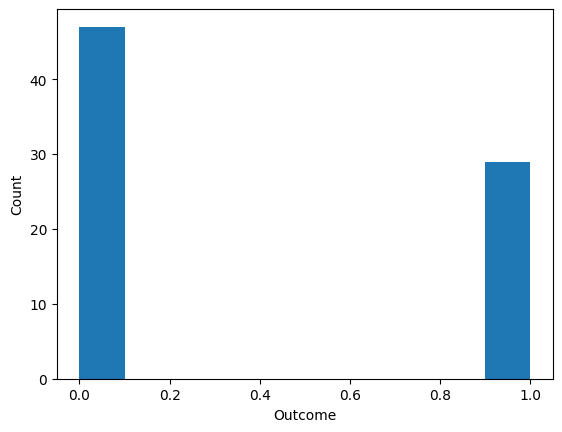

In [ ]:
plt.hist(df['Outcome'])
plt.show
plt.xlabel("Outcome")
plt.ylabel("Count")

In [ ]:
#We split the features and labels into the train and test for X and Y
#Test set is 30% or 0.3 we train on 0.7 or 70%
#Random_state is a random number 42 is good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [ ]:
N, D = X_train.shape

In [ ]:
X_train.shape

(60, 18)

In [ ]:
#Set seed values
tf.random.set_seed(10)
#Create Model
model_2 = Sequential([
    Dense(units=64, activation='relu', input_shape=[D,]),
    Dense(units=32, activation='relu', input_shape=[D,]),
    Dense(units=16, activation='relu', input_shape=[D,]),
    Dense(units=8, activation='relu', input_shape=[D,]),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
#fit the model
history_2= model_2.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose = 0)

In [ ]:
# Evaluate the Classication model
eval_model=model_2.evaluate(X_test, y_test)
eval_model

1/1 [==============================] - 0s 48ms/step - loss: 1.0583 - accuracy: 0.7500


[1.0582876205444336, 0.75]

In [ ]:
test_predictions = model_2.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(16))

1/1 [==============================] - 0s 136ms/step


In [ ]:
y_pred=model_2.predict(X_test).flatten()
y_pred = np.round(y_pred).astype('int')
df_predictions = pd.DataFrame(
    {'Ground_Truth': y_test, 'Model_prediction': y_pred},
    columns=[ 'Ground_Truth', 'Model_prediction'])
len(df_predictions[(df_predictions['Ground_Truth']!=df_predictions['Model_prediction'])])

1/1 [==============================] - 0s 30ms/step


4

[[8 3]
 [1 4]]


<Axes: >

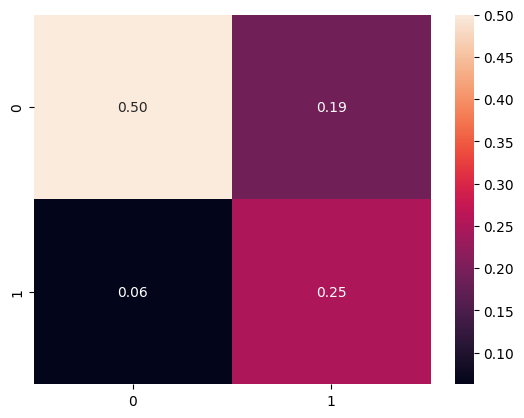

In [ ]:
#Generating the confusion matrix
eval = confusion_matrix(y_test, y_pred)
print(eval)
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, fmt='0.2f')

In [ ]:
class_names = [ '0', '1']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.57      0.80      0.67         5

    accuracy                           0.75        16
   macro avg       0.73      0.76      0.73        16
weighted avg       0.79      0.75      0.76        16



In [ ]:
model_2.save('my_custom_model_final_All_feats.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
